<a href="https://colab.research.google.com/github/edada2018/Big-Data-Analysis---Standard-CNN-and-Bagging-Learning-CNN/blob/main/E_Dada_DeepLearning_Practice_CNN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks using TensorFlow 2.x Keras API

#1. Introduction:

This tutorial is an introduction to Convolutional Neural Networks using TensorFlow 2.x Keras API. The dataset that we will work it is the Cifar10 dataset, a dataset of images from 10 different classes, and we will use a Sequential CNN to identify the class of an image.

This model reaches ~80% accuracy.

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

print(tf.__version__)

2.17.0


#2. Data Preprocessing

Before building any ML model, it is important to preprocess the data. In fact, data preprocessing will generally take up the most time in any ML pipeline. The following module goes over the steps to preprocess the CIFAR10 dataset for our purposes.



# 2.1 Load Data

Our first step is to load the data and divide it into a training and testing dataset. The CIFAR10 dataset can be downloaded directly from TensorFlow and has already been divided. Run the next cell to import the data.

x_train is the dataset of 32x32 color images of objects that the model will be trained on.

y_train is the dataset of labels that correspond to x_train.

x_test is the dataset of 32x32 color images of objects that the model will be tested on.

y_test is the dataset of labels that correspond to x_test.

Classes: 0. airplane 1. automobile 2. bird 3. cat 4. deer 5. dog 6. frog 7. horse 8. ship 9. truck

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()

Run the following code to see how many images are in each class. We see that each class has 5000 images. Having an even distribution of images is helpful for our model as it will have enough images to learn about the features for each class.

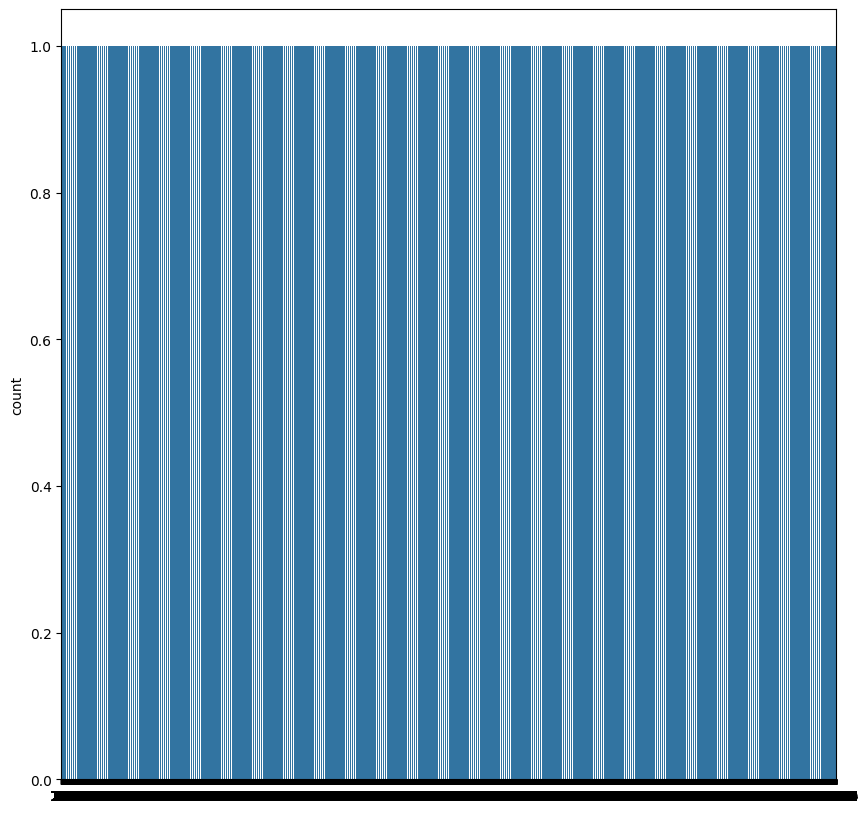

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
figsize=(10,10)
plt.figure(figsize=(10, 10))

p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

# Alternative approach suggested by ChatGPT

<ipython-input-30-088dea9df785>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x=y_train, palette="Set3")


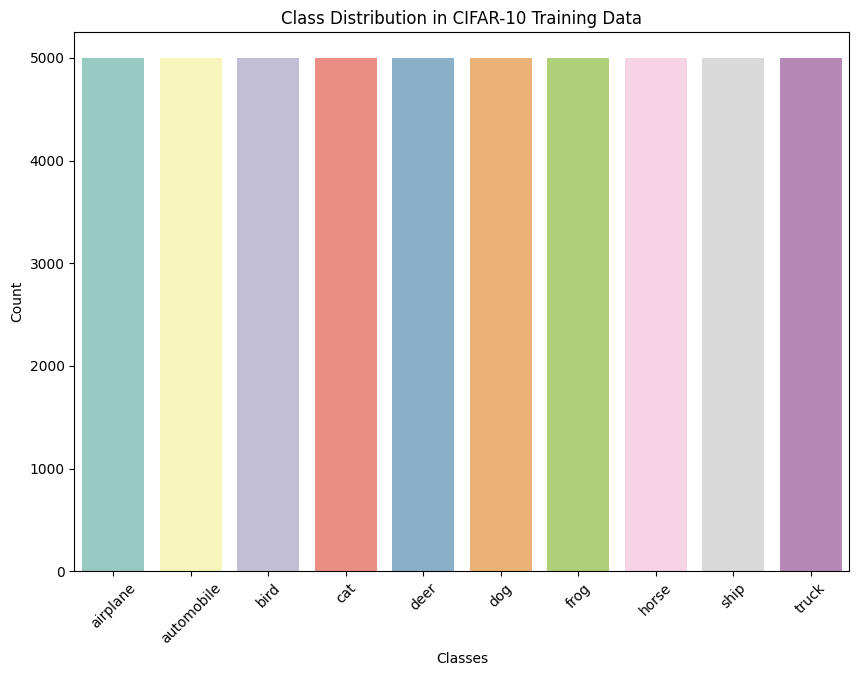

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Load the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten y_train to make it compatible with Seaborn's countplot
y_train = y_train.flatten()

# Class names for CIFAR-10 dataset
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting
plt.figure(figsize=(10, 7))
p = sns.countplot(x=y_train, palette="Set3")
p.set_xticks(range(len(classes)))
p.set_xticklabels(classes, rotation=45)
p.set_xlabel("Classes")
p.set_ylabel("Count")
p.set_title("Class Distribution in CIFAR-10 Training Data")

plt.show()


# Explanation:
**sns.countplot(x=y_train, palette="Set3"):**

 This plots the count of each unique value in y_train. We specify x=y_train instead of y=y_train.flatten() because countplot expects a one-dimensional array directly on the x axis.

**p.set_xticks(range(len(classes))):**

Sets the tick locations to match the number of classes.
p.set_xticklabels(classes, rotation=45):
Assigns the class names as x-axis labels and rotates them for better readability.

**palette="Set3":**

Sets a color palette; you **can** choose any palette from Seaborn to customize the colors.
This will display a bar plot with each bar representing the count of samples for each class in the CIFAR-10 training dataset, labeled with the class names like "airplane", "automobile", etc.

#2.2 Check for NaN Values

In [ ]:
np.isnan(x_train).any()

False

In [ ]:
np.isnan(x_test).any()

False

There are no NaN values in our dataset. There is no need to preprocess the data to deal with NaN's.

# 2.3 Normalization and Reshaping

Since the values in our x_train dataset are 32x32 color images, our input shape must be specified so that our model will know what is being inputed.

The first convolution layer expects a single 50000x32x32x3 tensor instead of 50000 32x32x3 tensors.

Models generally run better on normalized values. The best way to normalize the data depends on each individual dataset. For the CIFAR10 dataset, we want each value to be between 0.0 and 1.0. As all values originally fall under the 0.0-255.0 range, divide by 255.0.

Run the following cell to define the input_shape and to normalize and reshape the data.

In [ ]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

#2.4 Label Encoding

The labels for the training and the testing dataset are currently categorical and is not continuous. To include categorical dataset in our model, our labels should be converted to one-hot encodings.

For example, 2 (bird) becomes [0,0,1,0,0,0,0,0,0,0] and 7 (horse) becomes [0,0,0,0,0,0,0,1,0,0].

Run the following cell to transform the labels into one-hot encodings

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)


In [ ]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

#2.5 Visualize Data

Run the following cell to visualize an image in our dataset.

tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


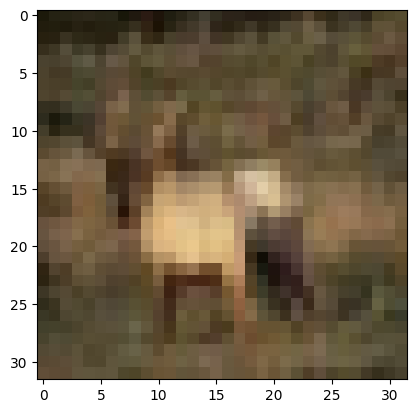

In [ ]:
plt.imshow(x_train[3])
print(y_train[3])


The image is an image of a ship. The one-hot encoding vector holds the value of the ship class.

#3. CNN

In this module, we will build our CNN model.

#3.1 Define the Model

Run the following cell to define batch_size, num_classes, and epochs. Try changing the values and test how different values affect the accuracy of the CNN model.

In [ ]:
batch_size = 32
num_classes = 10
epochs = 50

Run the following cell to build the model. The model contains various layers stacked on top of each other. The output of one layer feeds into the input of the next layer.

Conv2D layers are convolutions. Each filter (32 in the first two convolution layers and 64 in the next two convolution layers) transforms a part of the image (5x5 for the first two Conv2D layers and 3x3 for the next two Conv2D layers). The transformation is applied on the whole image.

MaxPool2D is a downsampling filter. It reduces a 2x2 matrix of the image to a single pixel with the maximum value of the 2x2 matrix. The filter aims to conserve the main features of the image while reducing the size.

Dropout is a regularization layer. In our model, 25% of the nodes in the layer are randomly ignores, allowing the network to learn different features. This prevents overfitting.

relu is the rectifier, and it is used to find nonlinearity in the data. It works by returning the input value if the input value >= 0. If the input is negative, it returns 0.

Flatten converts the tensors into a 1D vector.

The Dense layers are an artificial neural network (ANN). The last layer returns the probability that an image is in each class (one for each digit).

As this model aims to categorize the images, we will use a categorical_crossentropy loss function.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


The above code defines a convolutional neural network (CNN) model in TensorFlow using the Keras API. This model is structured to classify images, possibly the CIFAR-10 dataset, based on the architecture you’re using. Here’s a breakdown of the code:

**Code Explanation**
**Model Architecture:**

**Conv2D layers:**
Three groups of Conv2D layers, each followed by a MaxPooling2D and Dropout layer, help the model learn spatial hierarchies in images.

**MaxPooling2D:** Reduces the spatial dimensions of the feature maps, thus reducing computation and helping with translation invariance.

**Dropout:** Prevents overfitting by randomly setting a fraction of input units to zero during training.

**Flatten:**
Converts the 2D feature maps to a 1D vector for the dense (fully connected) layers.

**Dense:**
Adds fully connected layers to learn more complex representations.
softmax activation in the output layer: Converts the output to a probability distribution over num_classes (the number of classes in your classification task).
Compilation:

optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06): RMSprop optimizer with a small learning rate and decay for stability.
loss='categorical_crossentropy': Suitable for multi-class classification.
metrics=['acc']: Tracks accuracy during training.

#Suggested Modification
If you haven't defined num_classes, make sure it is set to the number of classes in your dataset, for example:

In [ ]:
num_classes = 10  # for CIFAR-10, which has 10 classes


#Step 1: Load the CIFAR-10 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


#Step 2: Fit the Model

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,  # Adjust as needed
    batch_size=64,  # Adjust as needed
    validation_split=0.1,  # 10% of training data for validation
    verbose=1
)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 184s 255ms/step - acc: 0.1553 - loss: 2.2054 - val_acc: 0.2268 - val_loss: 2.0583
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 194s 245ms/step - acc: 0.3016 - loss: 1.8872 - val_acc: 0.3436 - val_loss: 1.7644
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 203s 247ms/step - acc: 0.3609 - loss: 1.7293 - val_acc: 0.3830 - val_loss: 1.6667
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 203s 248ms/step - acc: 0.3984 - loss: 1.6355 - val_acc: 0.4510 - val_loss: 1.4985
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 199s 245ms/step - acc: 0.4390 - loss: 1.5265 - val_acc: 0.4782 - val_loss: 1.4009
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 173s 246ms/step - acc: 0.4711 - loss: 1.4549 - val_acc: 0.4910 - val_loss: 1.4149
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 193s 234ms/step - acc: 0.4888 - loss: 1.3960 - val_acc: 0.4890 - val_loss: 1.4197
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 203s 235ms/step - acc: 0.5119 - loss: 1.3432 - val_acc: 0.5106 - val_loss: 1.3443
Epoch 9/20
704/704 ━━━━━

#4. Evaluate the Model


#4.1 Loss and Accuracy Curves

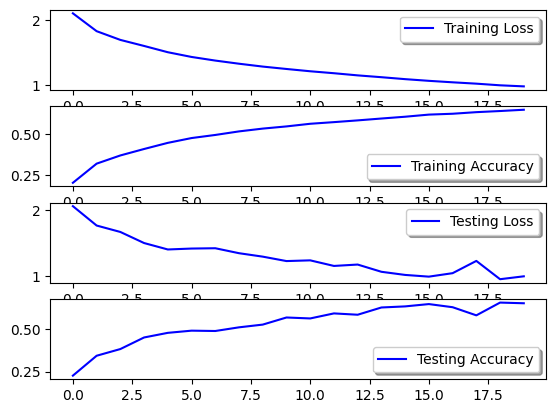

In [ ]:
fig, ax = plt.subplots(4,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(history.history['val_loss'], color='b', label="Testing Loss")
legend = ax[2].legend(loc='best', shadow=True)

ax[3].plot(history.history['val_acc'], color='b', label="Testing Accuracy")
legend = ax[3].legend(loc='best', shadow=True)

# ChatGPT - (a) Loss and Accuracy Curves

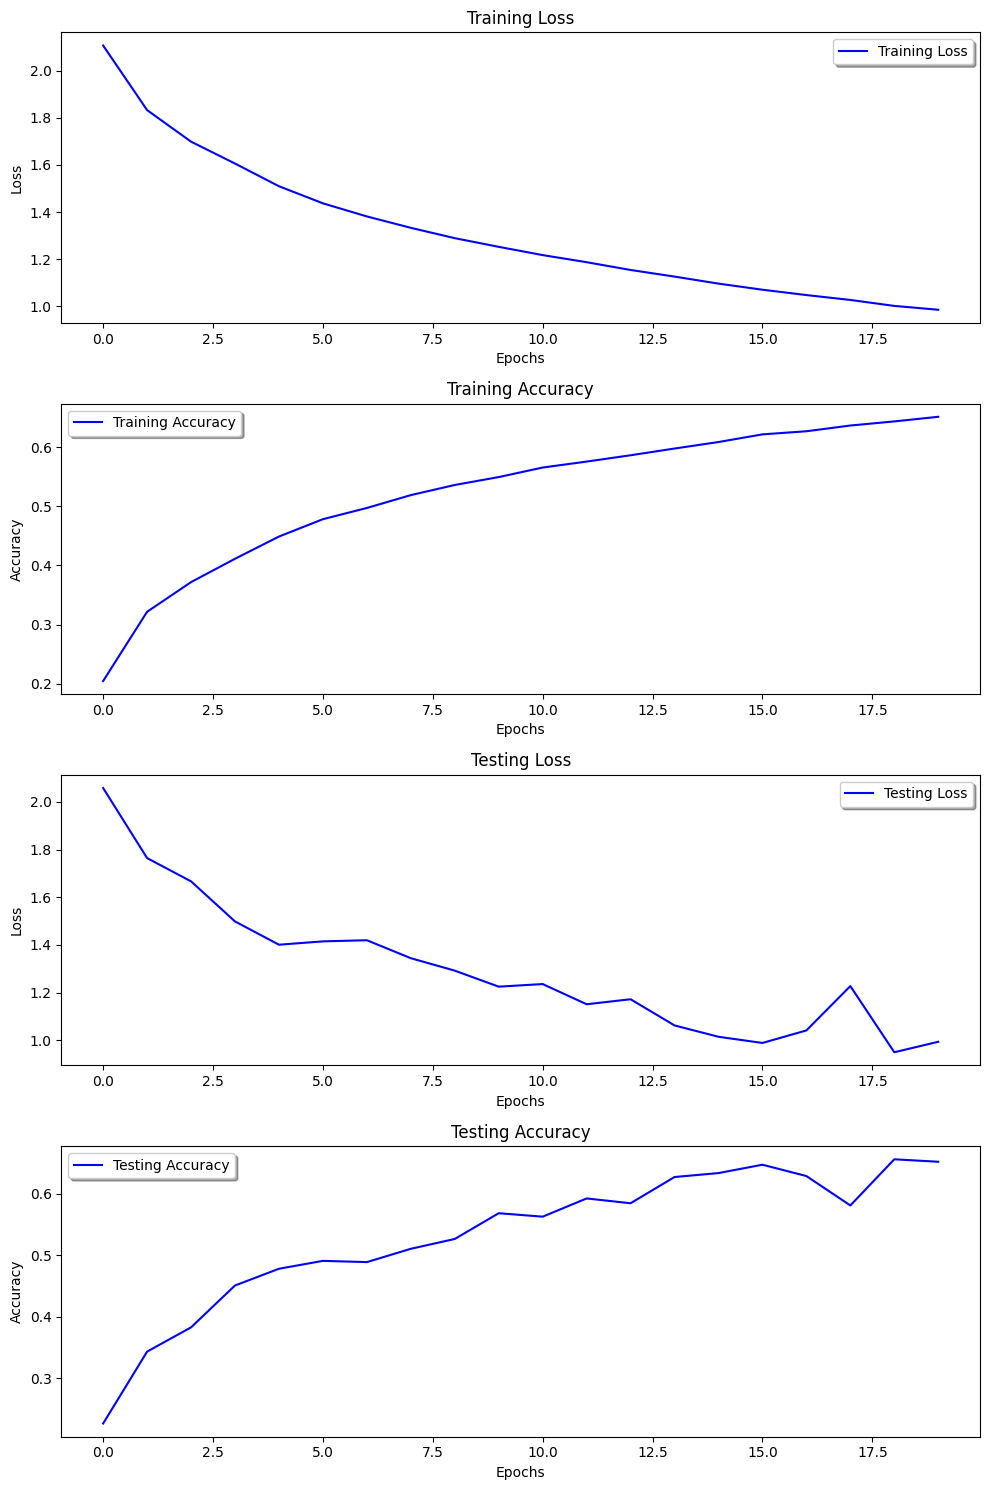

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(10, 15))  # Adjusting figure size for clarity

# Plot Training Loss
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].set_title('Training Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='best', shadow=True)

# Plot Training Accuracy
if 'acc' in history.history:  # Ensure 'acc' key exists
    ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
    ax[1].set_title('Training Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best', shadow=True)

# Plot Testing Loss
ax[2].plot(history.history['val_loss'], color='b', label="Testing Loss")
ax[2].set_title('Testing Loss')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best', shadow=True)

# Plot Testing Accuracy
if 'val_acc' in history.history:  # Ensure 'val_acc' key exists
    ax[3].plot(history.history['val_acc'], color='b', label="Testing Accuracy")
    ax[3].set_title('Testing Accuracy')
    ax[3].set_xlabel('Epochs')
    ax[3].set_ylabel('Accuracy')
    ax[3].legend(loc='best', shadow=True)

# Adjust layout for better display
plt.tight_layout()
plt.show()


**Explanation:**
Key Checks (acc and val_acc):
 Added checks to ensure that the acc and val_acc keys exist in history.history to prevent crashes.

**Figure Layout:**
Added tight_layout to improve the spacing between subplots.

**Figure Size: **
Set the figsize to make the plots more visually appealing.

**If Keys are Missing (acc or val_acc):**
Check the keys using
print(history.history.keys()) to confirm available metrics.

Modify the code accordingly to use the correct keys (e.g., accuracy, val_accuracy, or sparse_categorical_accuracy).

# 4.2 Evaluate Performance of the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - acc: 0.6476 - loss: 1.0022


is a built-in method to evaluate the performance of your model on the test dataset. Here's how it works and what it outputs:

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - acc: 0.6476 - loss: 1.0022
Test Loss: 1.0102
Test Accuracy: 0.6454


#Explanation:
**Purpose:**

Computes the test loss and test accuracy using the same metrics and loss function specified during the model.compile() step.

**Inputs:**

x_test: The test dataset (features).
y_test: The test labels (either one-hot encoded or sparse labels, depending on the model setup).

**Outputs:**

test_loss: The average loss over the test dataset.
test_acc: The accuracy on the test dataset (or other primary metric specified in model.compile()).

#4.3 Predict Results

# Chat GPT  - Code to predict Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
Prediction Accuracy: 0.65


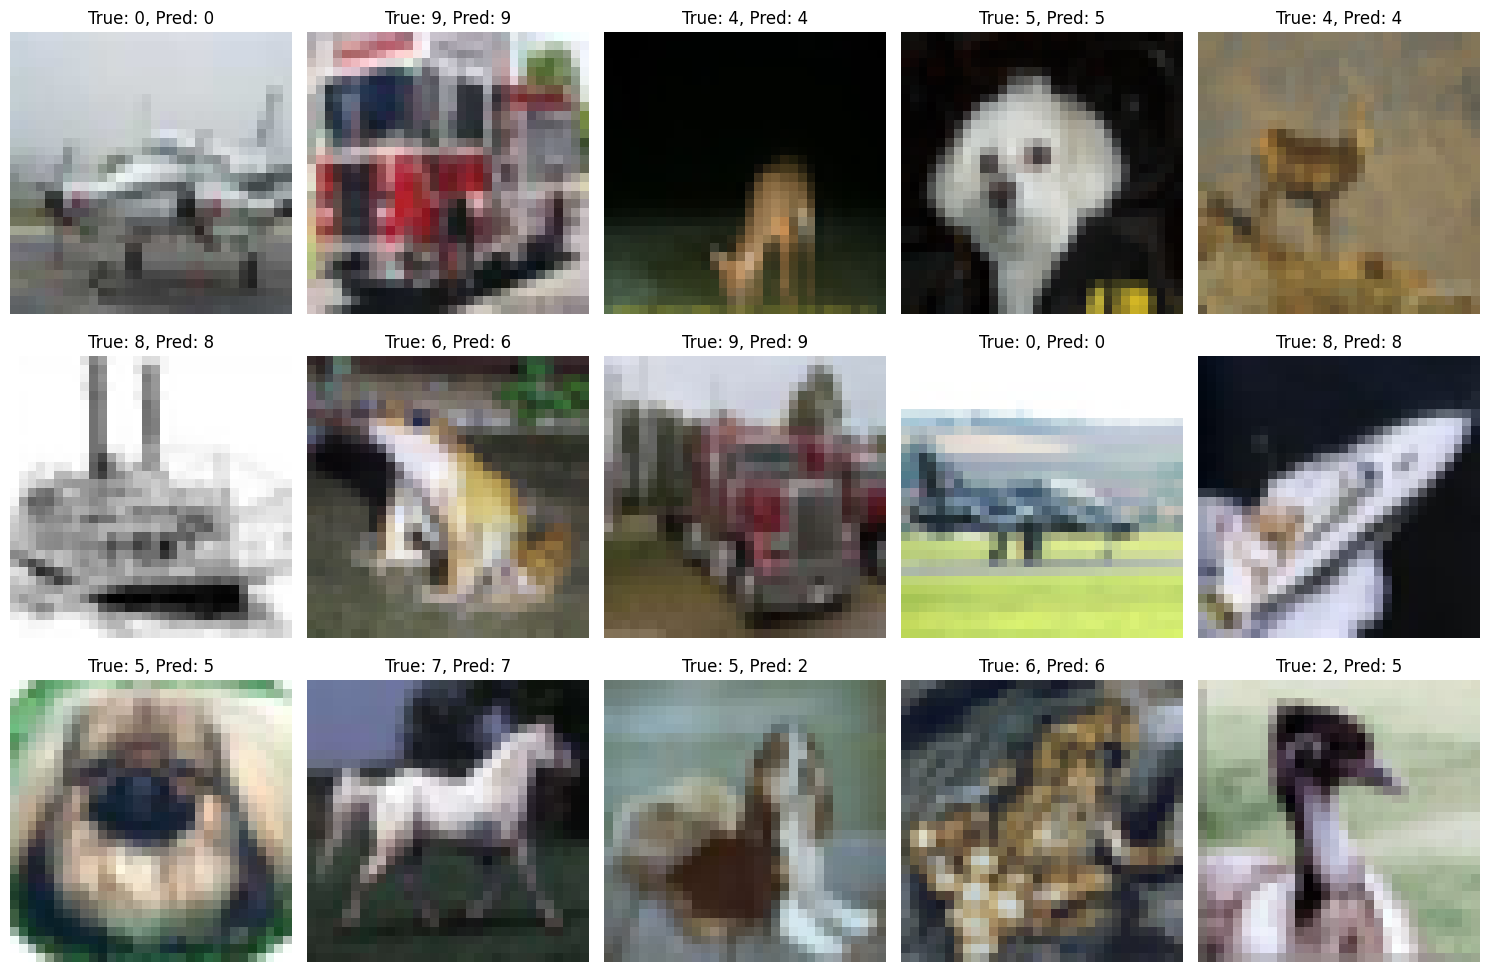

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(x_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy of predictions
accuracy = np.sum(y_pred_classes == y_true_classes) / len(y_true_classes)
print(f"Prediction Accuracy: {accuracy:.2f}")

# Display some predictions alongside true labels
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # Display 15 random test samples
axes = axes.ravel()

for i in range(15):
    index = np.random.randint(0, len(x_test))
    axes[i].imshow(x_test[index])
    axes[i].set_title(f"True: {y_true_classes[index]}, Pred: {y_pred_classes[index]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Steps in the Code
**Prediction (model.predict):**

y_pred contains the raw probabilities for each class.
np.argmax(y_pred, axis=1) converts these probabilities into class labels.

**True Labels:**

np.argmax(y_test, axis=1) converts one-hot encoded test labels into class labels for comparison.

**Accuracy Calculation:**

Compares predicted and true class labels and computes accuracy.

**Visualization:**

Randomly selects 15 test images and displays their predicted and true labels.

#Classification Report and Confusion Matrix

For a detailed breakdown of performance:


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      1000
           1       0.75      0.85      0.79      1000
           2       0.62      0.42      0.50      1000
           3       0.50      0.36      0.42      1000
           4       0.60      0.54      0.57      1000
           5       0.67      0.47      0.55      1000
           6       0.49      0.92      0.64      1000
           7       0.78      0.64      0.70      1000
           8       0.80      0.75      0.78      1000
           9       0.63      0.87      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.64     10000
weighted avg       0.66      0.65      0.64     10000



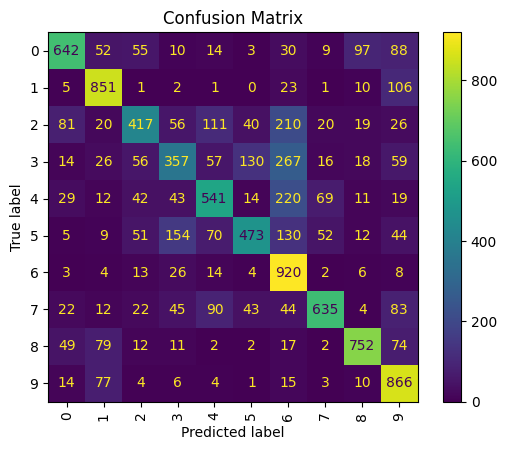

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix (as previously shown)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')
plt.title('Confusion Matrix')
plt.show()


#4.4 Confusion Matrix

Run the following cell to compute our confusion matrix using TensorFlow.



In [ ]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


Run the following cell to plot the confusion matrix. We see that our model classifies frogs pretty well, with 900 out of the 1000 frog images heving been classified correctly. We can also see that there is relatively high confusion between cats and dogs.



# Full Code for Confusion Matrix with Heatmap

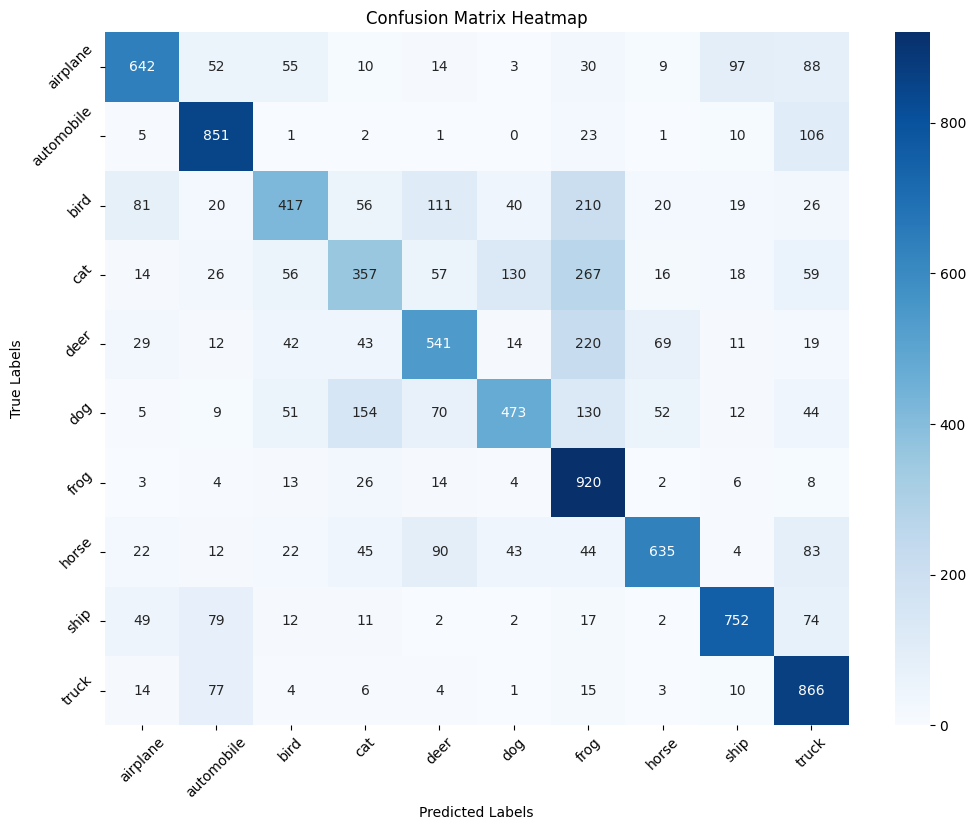

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true_classes and y_pred_classes are already defined
# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Define the class labels (update `classes` with your dataset labels)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the heatmap
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues')  # fmt='g' for integer labels
c.set(xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()
